In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
import re
warnings.filterwarnings('ignore')
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
cl_df = pd.read_csv('harmful_2_learning.csv')
cl_df.head(3)

,url_id,url,url_harmful_idx,harmful_word_num,harmful_child_num,img_num,child_num,harmful_weight,top_word
0,93215,rubens-kontaktanzeigen.com,0,1,0,2,4,0.025,mollig frauen ruben molligen anzeigen die rube...
1,214573,EaseWallet.com,0,1,1,0,0,0.025,browser chang cooki enabl javascript pleas req...
2,291180,wellingtonlions.co.nz,0,2,8,28,15,0.050,point wellington lion us follow home news rugb...


In [13]:
cl_df['top_word'] = cl_df['top_word'].fillna(" ")
cl_df['top_word'] = cl_df['top_word'].apply(lambda x : re.sub("[^a-zA-Z]"," ", x))

In [8]:
import numpy as np
import pandas as pd
import nltk
import re
import sys
import os
import codecs
import csv
from sklearn import feature_extraction
from nltk.stem.snowball import SnowballStemmer
# nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english') # '은,는,이,가' 이런거 없애주는 사전
stemmer = SnowballStemmer("english")  # 부사,형용사 이런걸 어근으로 바꿔줌

def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(stop_words='english',  max_df=0.9, max_features=10000, min_df=0.01, #ngram_range=(1,2), 
                                tokenizer=tokenize_only)

count_matrix = count_vectorizer.fit_transform(cl_df['top_word'])
plt.savefig('ward_clusters.png', dpi=200) #save figure as ward_clusters

In [26]:
terms = count_vectorizer.get_feature_names()
print(terms)

['access', 'account', 'action', 'activ', 'ad', 'add', 'address', 'adult', 'advertis', 'age', 'agenc', 'ago', 'agre', 'ai', 'al', 'amateur', 'anal', 'ani', 'anim', 'app', 'applic', 'april', 'archiv', 'area', 'art', 'articl', 'asian', 'ass', 'auf', 'avail', 'award', 'b', 'babe', 'bbw', 'bdsm', 'beauti', 'best', 'bet', 'big', 'black', 'blog', 'blond', 'bodi', 'boob', 'book', 'boy', 'brand', 'browser', 'build', 'busi', 'busti', 'buy', 'c', 'cam', 'car', 'career', 'casino', 'categori', 'center', 'chang', 'chat', 'check', 'citi', 'click', 'client', 'clip', 'club', 'cock', 'code', 'collect', 'colleg', 'com', 'come', 'comment', 'communiti', 'compani', 'condit', 'connect', 'contact', 'content', 'continu', 'cooki', 'copyright', 'creat', 'cum', 'custom', 'd', 'data', 'date', 'day', 'decemb', 'den', 'der', 'des', 'design', 'deutsch', 'develop', 'dick', 'die', 'digit', 'directori', 'display', 'domain', 'download', 'du', 'e', 'educ', 'een', 'ein', 'email', 'en', 'enabl', 'english', 'enjoy', 'enter',

In [27]:
from sklearn.cluster import KMeans
K = range(1,17)
distortions = []
for k in K:
    kmeansModel = KMeans(n_clusters=k).fit(count_matrix)
    distortions.append(kmeansModel.inertia_)
    print("iteration : %s"%k)

iteration : 1
iteration : 2
iteration : 3
iteration : 4
iteration : 5
iteration : 6
iteration : 7
iteration : 8
iteration : 9
iteration : 10
iteration : 11
iteration : 12
iteration : 13
iteration : 14
iteration : 15
iteration : 16


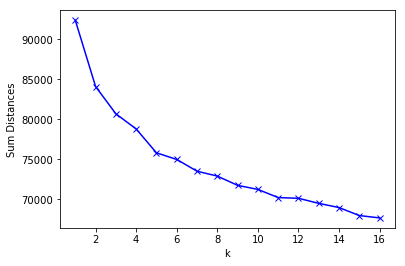

In [28]:
import matplotlib.pyplot as plt
plt.plot(K, distortions,'-bx')
plt.xlabel('k')
plt.ylabel('Sum Distances')
plt.savefig('elbow.png', dpi=200) #save figure as ward_clusters

In [29]:
from sklearn.cluster import KMeans

num_clusters = 9

km = KMeans(n_clusters=num_clusters)

km.fit(count_matrix)

clusters9 = km.labels_.tolist()

In [30]:
from sklearn.cluster import KMeans

# 8개 집합으로 군집화 수행. 예제를 위해 동일한 클러스터링 결과 도출용 random_state=0 
km_cluster = KMeans(n_clusters=8, max_iter=10000, random_state=0)
km_cluster.fit(count_matrix)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_

In [31]:
cl_df['cluster_label'] = cluster_label
cl_df.head()

,url_id,url,url_harmful_idx,harmful_word_num,harmful_child_num,img_num,child_num,harmful_weight,top_word,cluster_label
0,93215,rubens-kontaktanzeigen.com,0,1,0,2,4,0.025,mollig frauen ruben molligen anzeigen die rube...,5
1,214573,EaseWallet.com,0,1,1,0,0,0.025,browser chang cooki enabl javascript pleas req...,6
2,291180,wellingtonlions.co.nz,0,2,8,28,15,0.050,point wellington lion us follow home news rugb...,0
3,408036,fasttrackaffiliates.net,0,2,6,7,30,0.050,affili fast track work program casino team bra...,0
4,214524,FoRobotics.com,0,1,1,0,0,0.025,browser chang cooki enabl javascript pleas req...,6


In [35]:
cl_df[cl_df['cluster_label']==1].sort_values(by='url_id')

,url_id,url,url_harmful_idx,harmful_word_num,harmful_child_num,img_num,child_num,harmful_weight,top_word,cluster_label
1563,188,gayemart.com,1,7,5,1,5,0.675,gay adult emart movi porn sex star toy sexual ...,1
9021,235,100livecam.com,5,14,9,25,15,0.850,cam free view live porn tube video sex livecam...,1
4691,470,freesextubesites.com,1,16,116,151,102,0.900,fuck sex news young free big girl video matur ...,1
9918,544,bulldogclips.com,0,8,0,42,4,0.200,big password bulldog login madthumb pornstar u...,1
8227,613,pornvideoondemand.org,1,9,1,3,4,0.725,porn video demand amateur asian bisexu cumshot...,1
4145,810,fooxybabes.com,2,14,15,62,19,0.850,mar babe nake nude sexi girl hot pussi site ge...,1
8574,958,sensualwriter.com,0,13,1,9,3,0.325,review porn asian sex japanes nude model pussi...,1
9809,1023,tubebunch.com,0,13,7,55,8,0.325,view ago day porn free video xxx hot watch afr...,1
3906,1137,hardcorevideotube.com,0,12,33,49,26,0.300,tube video hardcor teen password get login por...,1
6403,1467,maturesanalsex.com,1,11,30,12,35,0.775,anal matur sex mom get ass video fuck site tig...,1


In [36]:
cl_df[cl_df['cluster_label']==2].sort_values(by='url_id')

,url_id,url,url_harmful_idx,harmful_word_num,harmful_child_num,img_num,child_num,harmful_weight,top_word,cluster_label
6861,16048,boobinspector.net,0,10,53,57,53,0.250,year fuck like like boob porn month sex milf...,2
6954,24461,chunkychicks.net,0,7,5,80,13,0.175,month like bbw fuck get week like milf black...,2
741,28148,xxxtube999.com,1,7,7,81,12,0.675,month year like fuck like get like like as...,2
2545,28709,japanesetube4.com,0,7,12,38,11,0.175,beep day asian babe fuck like get like week ...,2
8934,51239,onsexvideos.com,1,6,50,102,33,0.650,beep sex send year get porn fuck like video b...,2
1152,51256,xpornflix.xxx,1,8,64,92,49,0.700,month send sex porn black get year free hot li...,2
9163,51257,hdsex.sexy,1,7,63,90,35,0.675,sexi sex send month year get video like fuck ...,2
6183,73735,tub99.org,0,7,8,64,12,0.175,fuck get make year asscum hour like love tub ...,2
1890,74591,youjizzpron.info,0,4,10,38,11,0.100,pron day beep jizz fuck asian like get av c...,2
2147,114940,hd-fucktv.com,1,6,74,70,57,0.650,send fuck tv year sex hd usprofil beep like m...,2


In [37]:
cluster_centers = km_cluster.cluster_centers_
print('cluster_centers shape :',cluster_centers.shape)
print(cluster_centers)

cluster_centers shape : (8, 331)
[[ 0.05272827  0.03564211  0.01341172 ...,  0.00459306  0.04868639
   0.00532794]
 [ 0.04630152  0.01468097  0.02597403 ...,  0.16883117  0.03839639
   0.09034444]
 [ 0.          0.          0.         ...,  0.15        0.85        0.05      ]
 ..., 
 [ 0.003663    0.          0.         ...,  0.003663    0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.05589124  0.05966767  0.02114804 ...,  0.00528701  0.02719033
   0.00528701]]


In [55]:
# 군집별 top n 핵심단어, 그 단어의 중심 위치 상대값, 대상 파일명들을 반환함. 
def get_cluster_details(cluster_model, cluster_data, feature_names, clusters_num, top_n_features=20):
    cluster_details = {}
    
    # cluster_centers array 의 값이 큰 순으로 정렬된 index 값을 반환
    # 군집 중심점(centroid)별 할당된 word 피처들의 거리값이 큰 순으로 값을 구하기 위함.  
    centroid_feature_ordered_ind = cluster_model.cluster_centers_.argsort()[:,::-1]
    
    #개별 군집별로 iteration하면서 핵심단어, 그 단어의 중심 위치 상대값, 대상 파일명 입력
    for cluster_num in range(clusters_num):
        # 개별 군집별 정보를 담을 데이터 초기화. 
        cluster_details[cluster_num] = {}
        cluster_details[cluster_num]['cluster'] = cluster_num
        
        # cluster_centers_.argsort()[:,::-1] 로 구한 index 를 이용하여 top n 피처 단어를 구함. 
        top_feature_indexes = centroid_feature_ordered_ind[cluster_num, :top_n_features]
        top_features = [ feature_names[ind] for ind in top_feature_indexes ]
        
        # top_feature_indexes를 이용해 해당 피처 단어의 중심 위치 상댓값 구함 
        top_feature_values = cluster_model.cluster_centers_[cluster_num, top_feature_indexes].tolist()
        
        # cluster_details 딕셔너리 객체에 개별 군집별 핵심 단어와 중심위치 상대값, 그리고 해당 파일명 입력
        cluster_details[cluster_num]['top_features'] = top_features
        cluster_details[cluster_num]['top_features_value'] = top_feature_values
        filenames = cluster_data[cluster_data['cluster_label'] == cluster_num]['url']
        filenames = filenames.values.tolist()
        cluster_details[cluster_num]['url'] = filenames
        
    return cluster_details

def print_cluster_details(cluster_details):
    for cluster_num, cluster_detail in cluster_details.items():
        print('####### Cluster {0}'.format(cluster_num))
        print('Top features:', cluster_detail['top_features'])
        print('Reviews 파일명 :',cluster_detail['url'][:20])
        print('==================================================')



In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer
feature_names = count_vectorizer.get_feature_names()

cluster_details = get_cluster_details(cluster_model=km_cluster, cluster_data=cl_df,\
                                   feature_names=feature_names, clusters_num=8, top_n_features=20 )
print_cluster_details(cluster_details)

####### Cluster 0
Top features: ['new', 'contact', 'site', 'use', 'en', 'read', 'free', 'news', 'home', 'event', 'view', 'day', 'post', 'video', 'best', 'websit', 'busi', 'book', 'access', 'blog']
Reviews 파일명 : ['wellingtonlions.co.nz', 'fasttrackaffiliates.net', 'dwf.tw', 'sharenationevents.com', 'coreinfrastructure.org', 'realhomeporn.org', 'septembercarrinonude.com', 'nsspain.com', 'sanfranciscocomfortinn.com', 'startupschool.org', 'laravelpodcast.com', 'stopk12indoctrination.org', 'wexphotovideo.com', 'wwf.dk', 'lispers.org', 'mitentacion.com', 'hahastop.com', 'hobbysexcam.nl', 'housebeautiful.com', 'martiniziekenhuis.nl']
####### Cluster 1
Top features: ['porn', 'sex', 'fuck', 'girl', 'video', 'hot', 'big', 'free', 'teen', 'cock', 'pussi', 'sexi', 'site', 'babe', 'ass', 'amateur', 'xxx', 'tit', 'anal', 'movi']
Reviews 파일명 : ['alexalorenfan.com', 'hqadultfuck.com', 'xxxteensex.net', 'fetishsurf.com', 'teenbigboobpics.com', 'aussiegirls.pictures', 'fuckfreecam.com', 'justbabesandtee